In [21]:
#Spam Classification using CNN - Convolutional Neural Network

In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input , GlobalMaxPool1D
from tensorflow.keras.layers import LSTM , Embedding
from tensorflow.keras.models import Model

In [6]:
df = pd.read_csv('spam.csv' , encoding = 'ISO-8859-1')

In [7]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"] , axis=1)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.columns = ['labels' , 'data']

In [11]:
df['b_labels'] = df['labels'].map({'ham':0,'spam' :1})
y = df['b_labels'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
#Spllitting Training data and Testing data
x_train , x_test , y_train , y_test = train_test_split(df['data'] , y , test_size=0.33)

In [13]:
#Converting Sentences to sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [14]:
#Check word index Mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print("Unique token count : %s" % V)

Unique token count : 7217


In [15]:
#Pad Sequences ( to get N * T matrix)
data_train = pad_sequences(sequences_train)
print(data_train.shape)

(3733, 162)


In [16]:
T = data_train.shape[1]
print(T)

162


In [17]:
data_test = pad_sequences(sequences_test , maxlen=T)
#maxlen to truncate longer sentences in test set
print(data_test.shape)

(1839, 162)


Model Building

In [18]:
# Emdedding Dimensionality
D = 20 # Vector Size

# Hidden state vector size
M = 15

# Input Layer
i = Input(shape=(T,)) # input layer takes in sequence of integers , so shape is T

# Embedding Layer
x = Embedding(V + 1 , D)(i) # Takes seq of integers and returns seq of word vectors . N * T * D array . Indexing starts from 1, so embedding size = (V+1) * D

# LSTM layer
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)

# Dense Layer
x = Dense(1, activation='sigmoid')(x) # sigmoid because of binary classification

model = Model(i, x)


In [19]:
# Compile the Model
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [20]:
#Train the Model
r = model.fit(x=data_train , y=y_train , epochs=5 , validation_data=(data_test,y_test)) 

Epoch 1/5
117/117 [==============================] - 6s 37ms/step - loss: 0.4789 - accuracy: 0.8511 - val_loss: 0.2951 - val_accuracy: 0.8641
Epoch 2/5
117/117 [==============================] - 4s 36ms/step - loss: 0.1831 - accuracy: 0.9437 - val_loss: 0.1227 - val_accuracy: 0.9761
Epoch 3/5
117/117 [==============================] - 4s 35ms/step - loss: 0.0718 - accuracy: 0.9869 - val_loss: 0.0790 - val_accuracy: 0.9793
Epoch 4/5
117/117 [==============================] - 4s 35ms/step - loss: 0.0367 - accuracy: 0.9946 - val_loss: 0.0727 - val_accuracy: 0.9821
Epoch 5/5
117/117 [==============================] - 4s 36ms/step - loss: 0.0233 - accuracy: 0.9965 - val_loss: 0.0663 - val_accuracy: 0.9826


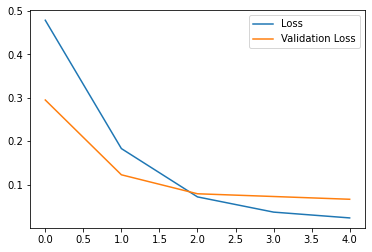

In [21]:
# Loss per iteration 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'Loss')
plt.plot(r.history['val_loss'],label = 'Validation Loss')
plt.legend()
plt.show()


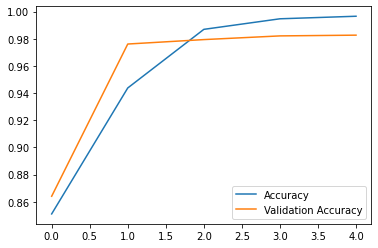

In [22]:
# Accuracy per Iteration
plt.plot(r.history['accuracy'] , label = 'Accuracy')
plt.plot(r.history['val_accuracy'] , label = 'Validation Accuracy')
plt.legend()
plt.show()
